# Práctica 5:

---
### Autores: Grupo 7
Raúl Murillo Montero - 5º Doble Grado en Ingeniería Informática - Matemáticas   
Miguel Sierra Esteso - 4º Grado en Ingeniería Informática

---
**Fecha de entrega:** 29 de noviembre de 2018, 18.00h

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

## 1. Regresión lineal regularizada

In [2]:
data = loadmat('ex5data1.mat')
# data.keys()
X, y = data['X'], data['y']
Xval, yval = data['Xval'], data['yval']
Xtest, ytest = data['Xtest'], data['ytest']

In [3]:
def h(X, theta):
    return X.dot(theta)

In [4]:
def J(theta, X, y, l_rate):
    return ((h(X, theta) - y.ravel()).dot(h(X, theta) - y.ravel())/(len(y)*2)
            + l_rate/(2*len(y))*(np.square(theta[1:])).sum())

In [5]:
def gradJ(theta, X, y, l_rate):
    aux = np.hstack(([0],theta[1:]))
    grad = (X.T.dot(h(X, theta) - y.ravel()))/len(y) + l_rate*aux/len(y)
    return grad

In [6]:
l_rate = 1
theta = np.array([1, 1]).ravel()
X_ = np.c_[np.ones((len(X),1)),X]

In [7]:
J(theta, X_, y, l_rate)

303.9931922202643

In [8]:
gradJ(theta, X_, y, l_rate) # Error on 2nd comp.?

array([-15.30301567, 598.25074417])

<IPython.core.display.Javascript object>


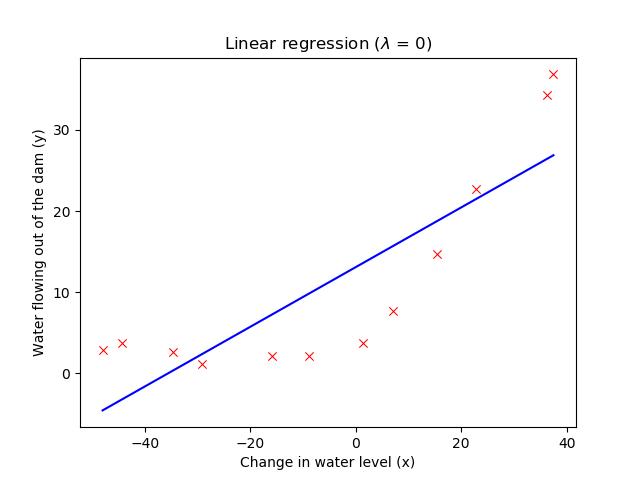

In [9]:
# Fase de entrenamiento por regresión lineal
l_rate = 0
fmin = minimize(fun = J, x0 = theta, args = (X_, y, l_rate))
# Plotting
plt.figure()
plt.scatter(X, y, marker = 'x', c = 'r', linewidth = 0.75)
lineX = np.linspace(min(X), max(X), 1000)
lineY = np.c_[np.ones((1000,1)), lineX].dot(fmin.x)
plt.plot(lineX, lineY, '-', c = 'blue')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Linear regression ($\lambda$ = 0)')
plt.show()

## 2. Curvas de aprendizaje
Para generar las curvas de aprendizaje, repetir el entrenamiento por regresión lineal
del apartado anterior, utilizando diferentes subconjuntos de los datos de entrenamiento.

In [10]:
def error(theta, X, y):
    return ((h(X, theta) - y.ravel()).dot(h(X, theta) - y.ravel())/(len(y)*2))

<IPython.core.display.Javascript object>


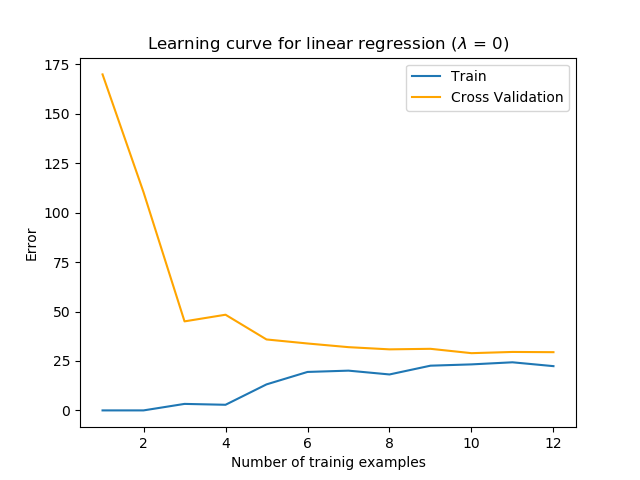

In [11]:
# Initialization
m = len(y)
errors = np.empty(m)
errorval = np.empty(m)
X_val = np.c_[np.ones((len(Xval), 1)), Xval]
theta = np.array([1, 1])
l_rate = 0

# Entrenamiento en múltiples multicojuntos
for i in range(1, m+1):   
    # Fase de entrenamiento por regresión lineal    
    fmin = minimize(fun = J, x0 = theta, args = (X_[:i], y[:i], l_rate))
    # evaluar el error del resultado aplicado sobre ese mismo subconjunto
    errors[i-1] = error(fmin.x, X_[:i], y[:i])
    # error al clasificar a todos los ejemplos del conjunto de validación
    errorval[i-1] = error(fmin.x, X_val, yval)
# Plotting
plt.figure()
plt.plot(range(1, m+1), errors)
plt.plot(range(1, m+1), errorval, c = 'orange')
plt.legend(("Train", "Cross Validation"))
plt.xlabel("Number of trainig examples")
plt.ylabel("Error")
plt.title('Learning curve for linear regression ($\lambda$ = 0)')
plt.show()

## 3. Regresión polinomial

In [12]:
def generate_train(X, p):
    """
    Generates a polynomial hypothesis h of degree p
    from a matrix X of dim mx1.
    The matrix that returns is dim mxp
    """
    h = np.empty((len(X),p))
    for i in range(p):
        h[:,i] = (X**(i+1)).ravel()
    return h

In [13]:
def normalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

In [14]:
def normalize_data(X, mu, sigma):
    return (X - mu) / sigma

<IPython.core.display.Javascript object>


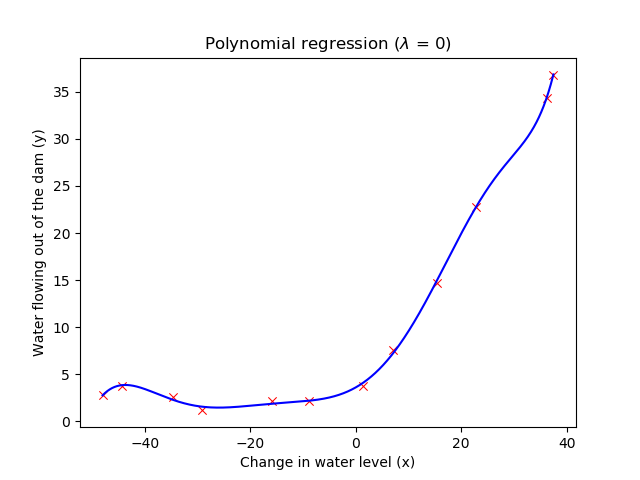

In [15]:
# Generar los nuevos datos de entrada para aprender un polinomio de grado p = 8
p = 8
X_ext, mu, sigma = normalize(generate_train(X, p))
X_ext = np.c_[np.ones((len(X_ext), 1)), X_ext]
# aplicar de nuevo el método de regresión lineal
l_rate = 0
theta = np.zeros(p+1)
fmin = minimize(fun = J, x0 = theta, args = (X_ext, y, l_rate))
# Plotting
plt.figure()
plt.scatter(X, y, marker = 'x', c = 'r', linewidth = 0.75)
lineX = np.arange(min(X), max(X), 0.05)
aux_x = normalize_data(generate_train(lineX, p), mu, sigma)
lineY = np.c_[np.ones((len(aux_x), 1)), aux_x].dot(fmin.x)
plt.plot(lineX, lineY, '-', c = 'blue')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial regression ($\lambda$ = 0)')
plt.show()

Generar las curvas de aprendizaje para la hipótesis polinomial

<IPython.core.display.Javascript object>


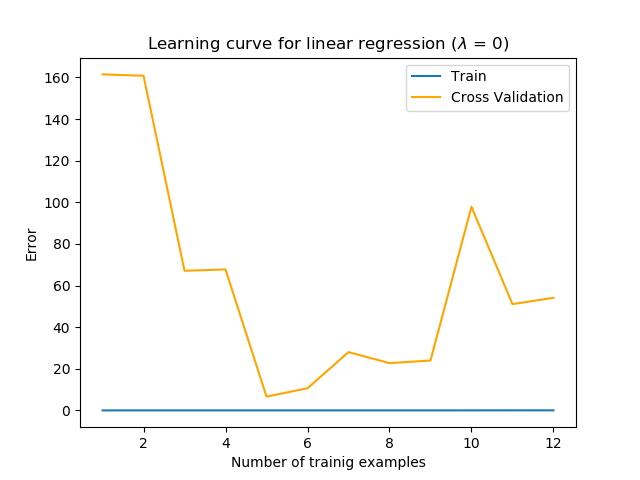

In [16]:
# Initialization
m = len(y)
errors = np.empty(m)
errorval = np.empty(m)
X_val = normalize_data(generate_train(Xval, p), mu, sigma)
X_val_ext = np.c_[np.ones((len(X_val), 1)), X_val]
theta = np.zeros(p+1)
l_rate = 0

# Entrenamiento en múltiples multicojuntos
for i in range(1, m+1):   
    # Fase de entrenamiento por regresión lineal    
    fmin = minimize(fun = J, x0 = theta, args = (X_ext[:i], y[:i], l_rate))
    # evaluar el error del resultado aplicado sobre ese mismo subconjunto
    errors[i-1] = error(fmin.x, X_ext[:i], y[:i])
    # error al clasificar a todos los ejemplos del conjunto de validación
    errorval[i-1] = error(fmin.x, X_val_ext, yval)
# Plotting
plt.figure()
plt.plot(range(1, m+1), errors)
plt.plot(range(1, m+1), errorval, c = 'orange')
plt.legend(("Train", "Cross Validation"))
plt.xlabel("Number of trainig examples")
plt.ylabel("Error")
plt.title('Learning curve for linear regression ($\lambda$ = 0)')
plt.show()

## 4. Selección del parámetro $\lambda$

<IPython.core.display.Javascript object>


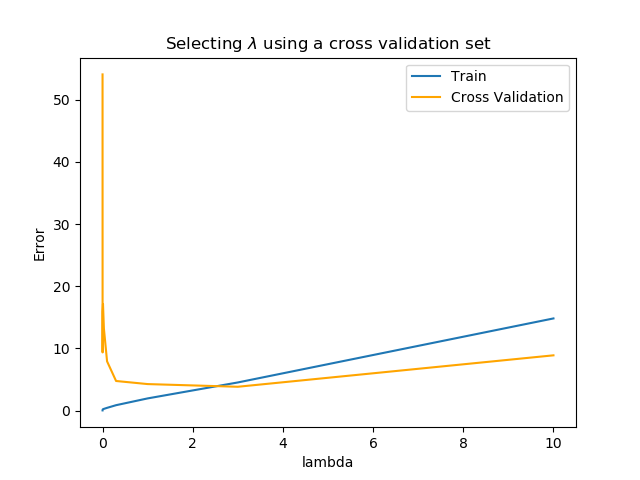

In [17]:
lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
m = len(lambdas)
errors = np.empty(m)
errorval = np.empty(m)
X_val = normalize_data(generate_train(Xval, p), mu, sigma)
X_val_ext = np.c_[np.ones((len(X_val), 1)), X_val]

theta = np.zeros(p+1)
i = 0
# Entrenamiento con distintos valores del parámetro lambda
for l in lambdas:
    # Fase de entrenamiento por regresión lineal    
    fmin = minimize(fun = J, x0 = theta, args = (X_ext, y, l))
    # evaluar el error del resultado aplicado sobre ese mismo subconjunto
    errors[i] = error(fmin.x, X_ext, y)
    # error al clasificar a todos los ejemplos del conjunto de validación
    errorval[i] = error(fmin.x, X_val_ext, yval)
    i += 1
# Plotting
plt.figure()
plt.plot(lambdas, errors)
plt.plot(lambdas, errorval, c = 'orange')
plt.legend(("Train", "Cross Validation"))
plt.xlabel("lambda")
plt.ylabel("Error")
plt.title('Selecting $\lambda$ using a cross validation set')
plt.show()    

Estimar el error de la hipótesis aplicándola a un tercer conjunto de ejemplos que no haya sido utilizado.

In [18]:
# Initialization
l = 3
X_test = normalize_data(generate_train(Xtest, p), mu, sigma)
X_test_ext = np.c_[np.ones((len(X_test), 1)), X_test]
theta = np.zeros(p+1)
# Training
fmin = minimize(fun = J, x0 = theta, args = (X_ext, y, l))
# Prediction
print('El error obtenido para lambda = {} es {}'.format(l, error(fmin.x, X_test_ext, ytest)))

El error obtenido para lambda = 3 es 3.572026498317881
